In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Informações Básicas do Dataset

In [2]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)
df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [3]:
df["Cidade"].unique()
df = df.drop(columns="Cidade")

In [4]:
# Analisando a coluna de Valor para extrair somente os valores numéricos
df["Valor"].str.replace(r"\d", "", regex=True).unique()

array(['R$ ..', 'R$ .', 'R$ .\n                      /Mês',
       'R$ .\n                      /Ano',
       'R$ .\n                      /Dia'], dtype=object)

In [5]:
df["Valor (milhão)"] = df["Valor"].str.replace(r"\D", "", regex=True)
df["Valor (milhão)"] = pd.to_numeric(df["Valor (milhão)"]) / 1000000
vendas = ~df["Valor"].str.contains(r"\n")
df_vendas = pd.DataFrame(df[vendas]).drop(columns=["Valor"])
df_vendas

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor (milhão)
0,"Avenida Itacira, 255",Planalto Paulista,1000,4,8,6,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,496,4,4,4,3.700
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,0.380
3,NaN,Jardim Morumbi,310,3,2,4,0.685
4,"Rua Tobias Barreto, 195",Mooca,100,3,2,2,0.540
...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,267,3,6,4,1.500
10003,Rua Tapuçu,Vila Sofia,95,2,2,2,0.665
10004,Rua Guararema,Bosque da Saúde,605,8,7,5,2.300
10005,Rua Estero Belaco,Vila da Saúde,205,3,3,6,1.050


In [6]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             6107 non-null   object 
 1   Bairro          9146 non-null   object 
 2   Metragem        9156 non-null   int64  
 3   Quartos         9156 non-null   int64  
 4   Banheiros       9156 non-null   int64  
 5   Vagas           9156 non-null   int64  
 6   Valor (milhão)  9156 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 572.2+ KB


# 1. Média da Metragem por bairro

In [7]:
qtd_dados_por_bairro = df_vendas["Bairro"].value_counts()
qtd_dados_por_bairro.describe()

count    697.000000
mean      13.121951
std       34.800718
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      369.000000
Name: Bairro, dtype: float64

In [8]:
bairros_com_mais_de_um_dado = qtd_dados_por_bairro.to_frame()
bairros_com_mais_de_um_dado.columns = ["Qtd"]
bairros_com_mais_de_um_dado = bairros_com_mais_de_um_dado.query("Qtd > 1").index
bairros_com_mais_de_um_dado

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor',
       ...
       'Vila Clarice', 'Jardim Satélite', 'Jardim Vivan',
       'Parada XV de Novembro', 'Vila das Belezas', 'Vila Paulicéia',
       'Vila Carrao', 'Sítio da Figueira', 'Vila Nova Caledonia',
       'Vila Inglesa'],
      dtype='object', length=514)

In [9]:
media_metragem_por_bairro = df_vendas[df_vendas["Bairro"].isin(bairros_com_mais_de_um_dado)].groupby("Bairro").mean()[["Metragem"]]
media_metragem_por_bairro

,Metragem
Bairro,
Aclimação,246.164557
Alto da Boa Vista,418.875000
Alto da Lapa,299.250000
Alto da Mooca,270.050000
Alto de Pinheiros,429.853659
...,...
Vila Água Funda,152.200000
Água Branca,173.583333
Água Fria,165.416667


In [10]:
df_vendas.groupby('Bairro').mean()["Metragem"]

Bairro
Aclimação            246.164557
Alto da Boa Vista    418.875000
Alto da Lapa         299.250000
Alto da Mooca        270.050000
Alto de Pinheiros    429.853659
                        ...    
Vila Água Funda      152.200000
Água Branca          173.583333
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            186.166667
Name: Metragem, Length: 697, dtype: float64

# 2. Formas de Consulta de Dados por Bairro

In [11]:
df_vendas[df_vendas["Bairro"] == "Aclimação"]

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor (milhão)
269,"Rua Ximbó, 410",Aclimação,140,4,3,4,0.800000
670,"Rua Alabastro, 151",Aclimação,129,3,2,3,0.960000
1265,Rua Carlos Chagas,Aclimação,280,3,2,2,2.200000
1287,Rua Doutor João Maia,Aclimação,380,3,5,2,2.660000
1347,Rua Doutor João Maia,Aclimação,385,3,5,2,2.660000
...,...,...,...,...,...,...,...
9140,Rua Doutor João Maia,Aclimação,311,4,4,3,2.200000
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,120,3,2,1,0.900001
9366,Rua Baturité,Aclimação,156,3,4,1,0.800000
9418,Rua André Gouveia,Aclimação,199,3,4,3,1.930000


In [12]:
df_vendas.query("Bairro == 'Aclimação'")

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor (milhão)
269,"Rua Ximbó, 410",Aclimação,140,4,3,4,0.800000
670,"Rua Alabastro, 151",Aclimação,129,3,2,3,0.960000
1265,Rua Carlos Chagas,Aclimação,280,3,2,2,2.200000
1287,Rua Doutor João Maia,Aclimação,380,3,5,2,2.660000
1347,Rua Doutor João Maia,Aclimação,385,3,5,2,2.660000
...,...,...,...,...,...,...,...
9140,Rua Doutor João Maia,Aclimação,311,4,4,3,2.200000
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,120,3,2,1,0.900001
9366,Rua Baturité,Aclimação,156,3,4,1,0.800000
9418,Rua André Gouveia,Aclimação,199,3,4,3,1.930000


# 3. Gráficos e Insights

Bairros com maior média de metragem

<AxesSubplot:ylabel='Bairro'>

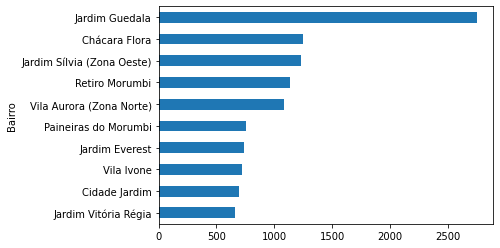

In [13]:
media_metragem_por_bairro["Metragem"].sort_values(ascending=False).head(10).sort_values().plot.barh()

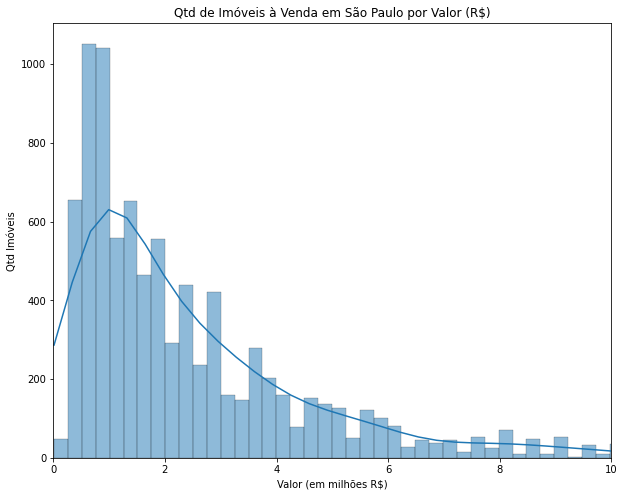

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df_vendas, x="Valor (milhão)", kde=True, ax=ax)
ax.set_ylabel('Qtd Imóveis')
ax.set_xlabel('Valor (em milhões R$)')
ax.set_title("Qtd de Imóveis à Venda em São Paulo por Valor (R$)")
ax.set_xlim((0, 10))
plt.show()

In [82]:
maior_percentil = df_vendas["Metragem"].quantile(q=0.99)
menor_percentil = df_vendas["Metragem"].quantile(q=0.1)
df_metragem_tratada = df_vendas[(df_vendas["Metragem"] >= menor_percentil) & (df_vendas["Metragem"] <= maior_percentil)]

<AxesSubplot:xlabel='Metragem', ylabel='Valor (milhão)'>

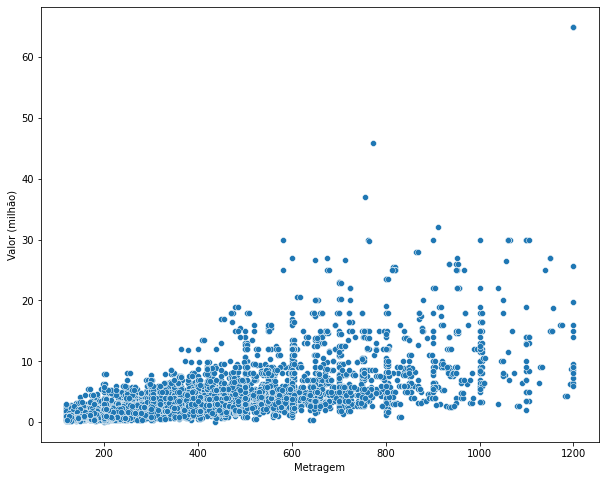

In [83]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_metragem_tratada, y="Valor (milhão)", x="Metragem", ax=ax)

# 4. Estatísticas Básicas

In [15]:
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor (milhão)
count,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000
mean,434.416230,3.446811,3.797073,3.960135,3.052203
std,7856.422978,1.048944,1.967873,2.601022,3.944208
min,10.000000,1.000000,1.000000,1.000000,0.013000
25%,168.000000,3.000000,2.000000,2.000000,0.890000
50%,276.000000,3.000000,4.000000,4.000000,1.800000
75%,450.000000,4.000000,5.000000,5.000000,3.500000
max,750000.000000,16.000000,40.000000,50.000000,65.000000


# 5. Bairros sem nome de Rua

In [16]:
df_vendas[df_vendas["Bairro"].isna()]

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor (milhão)
7956,Rua Vergueiro,NaN,103,3,2,2,0.640
7996,"Rua Alvorada do Sul, 3773",NaN,678,4,8,8,6.895
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,550,3,5,6,4.000
8566,"Avenida Comendador Adibo Ares, 3773",NaN,694,4,6,6,3.890
8619,"Rua Alvorada do Sul, 3773",NaN,683,4,8,8,6.895
8739,"Rua Alvorada do Sul, 3773",NaN,683,4,8,8,6.895
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,555,3,5,6,4.000
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,555,3,5,6,4.000
9310,"Rua Professor Lúcio Martins Rodrigues, 3773",NaN,358,4,6,7,1.600
9540,"Rua Pacobá, 3773",NaN,1009,5,6,10,6.400


# 6. Preço do Metro Quadrado por Bairro

In [58]:
df_metro_quadrado = pd.DataFrame(df_vendas)
df_metro_quadrado["Preço por m²"] = df_metro_quadrado["Valor (milhão)"] * 1000000 / df_metro_quadrado["Metragem"]
df_metro_quadrado

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor (milhão),Preço por m²
0,"Avenida Itacira, 255",Planalto Paulista,1000,4,8,6,7.000,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,496,4,4,4,3.700,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,0.380,3040.000000
3,NaN,Jardim Morumbi,310,3,2,4,0.685,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,100,3,2,2,0.540,5400.000000
...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,267,3,6,4,1.500,5617.977528
10003,Rua Tapuçu,Vila Sofia,95,2,2,2,0.665,7000.000000
10004,Rua Guararema,Bosque da Saúde,605,8,7,5,2.300,3801.652893
10005,Rua Estero Belaco,Vila da Saúde,205,3,3,6,1.050,5121.951220


In [65]:
df_metro_quadrado_por_bairro = df_metro_quadrado.groupby("Bairro").mean().sort_values("Preço por m²", ascending=False)
df_metro_quadrado_por_bairro[["Preço por m²"]]

,Preço por m²
Bairro,
Vila Guaca,80000.000000
Jardim América,24088.572449
Jardim Ampliação,20051.041667
Jardim Europa,19962.687870
Vila Nova Conceição,17614.033886
...,...
Jardim Brasília (Zona Leste),1055.009107
Jardim Itapemirim,1054.500000
Vila Aurea,906.593407
